# Error Analysis: Model MIPRO Results vs Ground Truth

This notebook provides comprehensive error analysis comparing model predictions against ground truth labels.

## Data Structure Overview

**Ground Truth (CSV)**:
- 59 binary `label_<error_code>` columns (True/False)
- `rationale_<error_code>` and `excerpt_<error_code>` for human annotations
- `any_error_present` and `positive_codes` columns

**Model Results (JSONL)**:
- `detected_errors`: List of dicts with `code_key`, `rationale`, `verbatim_excerpt`
- `error_codes`: List of predicted error code strings
- `num_errors`: Count of detected errors



# Error-Detection Model Evaluation: Analysis Design Document

This notebook evaluates four LLM-based error-detection models—DeepSeek-R1, Claude-3.7-Sonnet, GPT-5, and Llama-4-Maverick—against human-labeled ground truth in the MIPRO dataset, which contains **59 granular error codes**, organized into **subdomains**, which are themselves grouped into **5 top-level RAEC domains**.  

The goal is to assess model accuracy at all three levels of the ontology:  
1) **Domain level** (CR, CQ, PR, AC, BS)  
2) **Subdomain level** (e.g., CR01 Incorrect Assessment, CQ03 Empathy/Omission, etc.)  
3) **Error-code level** (59 fine-grained binary labels)

This hierarchical evaluation provides a holistic understanding of model strengths, weaknesses, and systematic failure modes.

---

## 1. Objectives

### Primary Objectives
1. Evaluate how accurately each model identifies the 59 error codes.  
2. Compare four models at **three hierarchical levels**:
   - Domain-level performance  
   - Subdomain-level performance  
   - Error-code-level performance  
3. Identify systematic strengths, weaknesses, and error detection patterns across models.

### Secondary Objectives
1. Provide visualizations enabling intuitive, multi-level comparison.  
2. Surface qualitative examples illustrating model failure modes and disagreements.  
3. Inform targeted improvements (retrieval reranking, calibration, guardrails).

---

## 2. Dataset Overview

### Ground Truth (CSV)
Includes:
- 59 binary columns: `label_<error_code>`  
- Subdomain and domain membership for each code (provided in ontology)  
- Human-written rationales and excerpts per error code  
- Aggregate fields (`any_error_present`, `positive_codes`)

### Model Predictions (JSONL)
Each model outputs:
- `error_codes`: list of detected error codes  
- `detected_errors`: list of dicts (code, rationale, excerpt)  
- `num_errors`  

Models evaluated:
- DeepSeek-R1  
- Claude-3.7-Sonnet  
- GPT-5  
- Llama-4-Maverick  

---

## 3. Evaluation Strategy

Model performance is evaluated at **three hierarchical levels**, plus aggregate performance metrics.

---

## 3.1 Instance-Level Evaluation

**Goal:** Determine how accurately each model recovers the *full set of errors* for each message.

**Metrics**
- Exact Match Ratio  
- Jaccard Similarity (per instance)  
- Micro Precision / Recall / F1  
- Any-Error Accuracy  

**Why:**  
Clinicians care about complete detection—missing one serious error has real clinical implications.

**Visualizations**
- Exact match comparison across models  
- Jaccard similarity distribution  

---

## 3.2 Error-Code-Level Evaluation (All 59 Fine-Grained Codes)

**Goal:** Assess fine-grained model behavior at the individual label level.

**Metrics**
- Per-label precision, recall, and F1  
- Support (frequency of the label in dataset)  
- FP/FN counts per label  
- Error co-occurrence and confusion patterns

**Why:**  
Models often excel at some specific codes and struggle with others, even within the same domain.

**Visualizations**
- F1 heatmap (59 labels × 4 models)  
- Sorted bar plots: top and bottom performing error codes  
- FP/FN Pareto chart (top 15 error codes driving most mistakes)  
- Co-occurrence heatmap  

---

## 3.3 Subdomain-Level Evaluation

Each domain contains several subdomains (e.g., Clinical Incorrectness, Missing Rationale, Tone Issues, Empathy Gaps, etc.).

**Goal:** Reveal mid-level thematic strengths and weaknesses within each domain.

**Metrics**
- Subdomain macro F1  
- Subdomain precision and recall  
- FP/FN subdomain summaries  
- Subdomain-level confusion patterns

**Why:**  
A model may detect “clinical reasoning errors” broadly but fail specific subtypes (e.g., incorrect reasoning vs missing differential reasoning).  
Evaluating at this level guides:
- Retrieval improvements  
- Prompt engineering  
- Calibration of subdomain detection thresholds  

**Visualizations**
- Subdomain F1 heatmap (subdomains × models)  
- Bar plot of top vs worst-performing subdomains  
- Subdomain confusion matrix  

---

## 3.4 Domain-Level Evaluation (5 RAEC Domains)

Domains:
- **CR — Clinical Reasoning**  
- **CQ — Communication Quality**  
- **PR — Privacy & Security**  
- **AC — Accessibility**  
- **BS — Bias & Stigmatization**

**Goal:** Evaluate high-level conceptual performance consistent with clinician mental models.

**Metrics**
- Domain macro F1  
- Domain precision, recall  
- Domain FP/FN counts  
- Domain-level support  

**Why:**  
Clinicians reason in conceptual categories. Models must perform well at this level to be practically reliable.

**Visualizations**
- Grouped bar chart: F1 by domain × model  
- Domain precision/recall heatmap  
- Stacked FP/FN charts per domain  

---

## 3.5 Aggregate Model Comparison

**Metrics**
- Micro F1  
- Macro F1  
- Weighted F1  
- Samplewise Jaccard similarity  
- Hamming loss  
- Exact match ratio  

**Why:**  
Provides a high-level ranking of overall model performance across all labels and instances.

**Visualizations**
- Radar plot comparing overall metrics across models  

---

## 3.6 Confusion and Failure Mode Analysis

**Goal:** Understand systematic ways models fail.

**Outputs**
- Most common false positives  
- Most common false negatives  
- Over-calling vs under-calling tendencies  
- Domain- and subdomain-specific weaknesses  
- Error co-occurrence patterns and confusion clusters  

**Why:**  
These insights directly support:
- Guardrail design  
- Retrieval reranking  
- Label-specific calibration  
- Improved LLM prompting strategies  

**Visualizations**
- FP/FN bar charts  
- Subdomain and domain-level confusion heatmaps  
- Error co-occurrence network or heatmap  

---

## 3.7 Qualitative Case Studies

**Goal:** Provide interpretable examples useful for manuscripts, presentations, and clinician review.

**Example types**
- Cases where all models fail  
- Cases where models strongly disagree  
- Cases where only one model detects subtle errors  
- High FP / high FN examples  

**Why:**  
These examples bridge quantitative results and real-world interpretability.

---

## 4. Summary of Multi-Level Evaluation

| Level | Purpose | Metrics | Visualizations |
|-------|---------|----------|----------------|
| **Domain** | High-level conceptual evaluation | Macro F1, P/R, FP/FN | Grouped bar charts, heatmaps |
| **Subdomain** | Thematic mid-level evaluation | Macro F1, P/R, FP/FN | Subdomain heatmaps, bar charts |
| **Error Code** | Fine-grained analysis | Per-label P/R/F1 | 59×4 heatmap, ranked bar charts |
| **Instance** | Clinical usefulness | Jaccard, exact match | Distributions, bar charts |
| **Aggregate** | Overall model ranking | Micro/Macro/Weighted F1 | Radar plots |
| **Confusion** | Understanding failure modes | FP/FN, co-occurrence | Heatmaps, networks |

---

## 5. Outputs Produced by This Notebook

### Tables
- Aggregate metrics  
- Domain-level metrics  
- Subdomain-level metrics  
- Per-label metrics (59-code table)

### Figures
- Domain F1 bar charts  
- Subdomain heatmaps  
- Error-code heatmaps (59×4)  
- FP/FN pattern plots  
- Radar plots  
- Jaccard distributions  

### Interpretive Text
- Model ranking summary  
- Domain/subdomain weakness analysis  
- Error-type failure mode analysis  
- Recommendations for improvement  

---

## 6. Interpretation and Next Steps (to-do)

This hierarchical evaluation supports:
- Model selection  
- Guardrail improvement  
- Retrieval and prompting optimizations  
- Subdomain- or domain-specific calibration  
- Identification of weak error categories needing augmentation or specialized logic

---

## 7. Appendix (to-do)

- Complete list of 59 error codes  
- Subdomain mapping  
- Domain mapping  
- JSONL schema for predictions  



In [15]:
import pandas as pd
import json
import numpy as np
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    hamming_loss, jaccard_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import defaultdict

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 100)

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# ##2. Data Loading and Preparation
#
# Here we:  
# 1. Define paths for ground truth and model outputs  
# 2. Load the ground truth CSV  
# 3. Load model prediction JSONL files  
# 4. Convert predictions into a 59-column binary label matrix aligned with ground truth


In [ ]:
# 2.1 Paths and model configs
MODEL_CONFIGS = {
    "DeepSeek-R1": "../output_deepseek-r1/results/results_deepseekr1_mipro.jsonl",
    "Claude-3.7-Sonnet": "../output_claude-3_5-sonnet-v2/results/results_claude35_mipro.jsonl",
    "GPT-5": "../output_gpt-5/results/results_gpt5_mipro.jsonl",
    "Llama-4-Maverick": "../output_llama4-maverick/results/results_llama4_mipro.jsonl",
}

GROUND_TRUTH_PATH = "../src/data/input_data/labeled_full_100_data.csv"


# Codebook: each row is a unique (Domain, Subdomain, Error Code) combination
# Adjust this path to where you store dedup_codebook.csv
CODEBOOK_PATH = "../src/data/input_data/dedup_codebook.csv"

# Name of the ID field in JSONL and GT (must match)
PRED_ID_FIELD = "index"
GT_ID_COL = "index"

In [52]:
# 2.2 Load ground truth
def load_ground_truth(csv_path):
    df = pd.read_csv(csv_path)
    label_cols = [c for c in df.columns if c.startswith("label_")]
    df[label_cols] = df[label_cols].astype(int)
    if GT_ID_COL not in df.columns:
        raise ValueError(f"Ground truth CSV missing ID column '{GT_ID_COL}'")
    return df, label_cols

gt, label_cols = load_ground_truth(GROUND_TRUTH_PATH)
print(f"Ground truth shape: {gt.shape}")
print(f"Number of label columns: {len(label_cols)}")

Ground truth shape: (100, 186)
Number of label columns: 59


In [55]:
# 2.3 Load model predictions from JSONL
def load_jsonl(path):
    records = []
    with open(path, "r") as f:
        for line in f:
            line = line.strip()
            if line:
                records.append(json.loads(line))
    return records

model_preds = {name: load_jsonl(path) for name, path in MODEL_CONFIGS.items()}
{k: len(v) for k, v in model_preds.items()}

{'DeepSeek-R1': 100,
 'Claude-3.7-Sonnet': 100,
 'GPT-5': 100,
 'Llama-4-Maverick': 100}

In [56]:
def convert_to_binary_matrix(pred_json, label_cols, id_field=PRED_ID_FIELD):
    """
    pred_json: list of dicts with keys including:
        - id_field: unique identifier (e.g., 'index')
        - 'error_codes': list of predicted error code strings
    label_cols: list of 'label_<code>' column names

    Returns a DataFrame with columns:
        [GT_ID_COL, label_..., label_...]
    """
    ids = []
    rows = []
    for entry in pred_json:
        msg_id = entry.get(id_field)
        if msg_id is None:
            raise ValueError(f"Entry is missing id field '{id_field}': {entry}")
        ids.append(msg_id)

        pred_codes = set(entry.get("error_codes", []))
        row = [1 if col.replace("label_", "") in pred_codes else 0 for col in label_cols]
        rows.append(row)

    df = pd.DataFrame(rows, columns=label_cols)
    df.insert(0, GT_ID_COL, ids)
    return df


# Build raw prediction matrices (with ID column)
binary_preds_raw = {
    name: convert_to_binary_matrix(preds, label_cols)
    for name, preds in model_preds.items()
}

for name, df_pred in binary_preds_raw.items():
    print(f"{name} raw shape:", df_pred.shape)

DeepSeek-R1 raw shape: (100, 60)
Claude-3.7-Sonnet raw shape: (100, 60)
GPT-5 raw shape: (100, 60)
Llama-4-Maverick raw shape: (100, 60)


In [59]:
# 2.5 Align ground truth and predictions by common IDs

gt_ids = set(gt[GT_ID_COL])
pred_id_sets = {name: set(df[GT_ID_COL]) for name, df in binary_preds_raw.items()}

common_ids = gt_ids.copy()
for name, id_set in pred_id_sets.items():
    common_ids &= id_set

print(f"Total GT rows: {len(gt_ids)}")
for name, ids_ in pred_id_sets.items():
    print(f"{name} prediction rows: {len(ids_)}")
print(f"Common IDs across GT + ALL models: {len(common_ids)}")

if len(common_ids) == 0:
    raise ValueError("No common IDs between ground truth and model predictions. Check ID field names and values.")


Total GT rows: 100
DeepSeek-R1 prediction rows: 100
Claude-3.7-Sonnet prediction rows: 100
GPT-5 prediction rows: 100
Llama-4-Maverick prediction rows: 100
Common IDs across GT + ALL models: 100


In [67]:
# 2.6 Build aligned GT and prediction matrices (same rows/order for all models)
#     and keep the message ID as the DataFrame index for fact-checking.

# Ground truth aligned to common IDs, indexed by ID
gt_aligned = (
    gt[gt[GT_ID_COL].isin(common_ids)]
    .set_index(GT_ID_COL)      # <-- ID becomes index
    .sort_index()
)
print("Aligned GT shape:", gt_aligned.shape)
print("Aligned GT index name:", gt_aligned.index.name)

binary_preds = {}
aligned_ids_per_model = {}

for name, df_pred in binary_preds_raw.items():
    aligned_pred = (
        df_pred[df_pred[GT_ID_COL].isin(common_ids)]
        .set_index(GT_ID_COL)  # <-- ID becomes index
        .sort_index()
    )

    # Sanity check ID alignment
    if not np.array_equal(gt_aligned.index.values, aligned_pred.index.values):
        raise ValueError(f"ID alignment mismatch for model {name}")

    aligned_ids_per_model[name] = aligned_pred.index.copy()
    # keep only label columns, but index = ID
    binary_preds[name] = aligned_pred[label_cols]
    print(f"{name} aligned shape:", binary_preds[name].shape)


Aligned GT shape: (100, 185)
Aligned GT index name: index
DeepSeek-R1 aligned shape: (100, 59)
Claude-3.7-Sonnet aligned shape: (100, 59)
GPT-5 aligned shape: (100, 59)
Llama-4-Maverick aligned shape: (100, 59)


# ## 3.1 Instance-Level Evaluation
#
# **Goal:** Determine how accurately each model recovers the *full set of errors* for each message.  
#
# **Metrics**
# - Per-instance Jaccard similarity  
# - Per-instance exact-match (1 if predicted set == true set)  
# - Summary statistics of these metrics per model  
#
# **Visualizations**
# - KDE / distribution of Jaccard similarity across models  
# - Bar plot of exact-match rate per model

In [70]:
def compute_instance_level_metrics(y_true_df, y_pred_df):
    """Return per-instance Jaccard and exact-match flags."""
    y_true = y_true_df.values
    y_pred = y_pred_df.values

    jaccards = []
    exact_matches = []
    for i in range(y_true.shape[0]):
        true_set = set(np.where(y_true[i] == 1)[0])
        pred_set = set(np.where(y_pred[i] == 1)[0])

        if not true_set and not pred_set:
            jaccard = 1.0
        elif not true_set and pred_set:
            jaccard = 0.0
        else:
            jaccard = len(true_set & pred_set) / len(true_set | pred_set)

        jaccards.append(jaccard)
        exact_matches.append(int(true_set == pred_set))

    df = pd.DataFrame({
        "jaccard": jaccards,
        "exact_match": exact_matches
    })
    return df

In [62]:
# %%
# 3.1.a Compute instance-level metrics for each model

instance_metrics = {
    model_name: compute_instance_level_metrics(
        gt_aligned[label_cols],
        pred_df[label_cols]
    )
    for model_name, pred_df in binary_preds.items()
}

for model_name, df_inst in instance_metrics.items():
    print(f"===== {model_name} =====")
    print(df_inst.describe())
    print("-" * 60)


===== DeepSeek-R1 =====
          jaccard  exact_match
count  100.000000        100.0
mean     0.042820          0.0
std      0.070863          0.0
min      0.000000          0.0
25%      0.000000          0.0
50%      0.000000          0.0
75%      0.067241          0.0
max      0.500000          0.0
------------------------------------------------------------
===== Claude-3.7-Sonnet =====
          jaccard  exact_match
count  100.000000        100.0
mean     0.047594          0.0
std      0.082701          0.0
min      0.000000          0.0
25%      0.000000          0.0
50%      0.000000          0.0
75%      0.071429          0.0
max      0.500000          0.0
------------------------------------------------------------
===== GPT-5 =====
          jaccard  exact_match
count  100.000000   100.000000
mean     0.063884     0.020000
std      0.159939     0.140705
min      0.000000     0.000000
25%      0.000000     0.000000
50%      0.000000     0.000000
75%      0.072802     0.000000


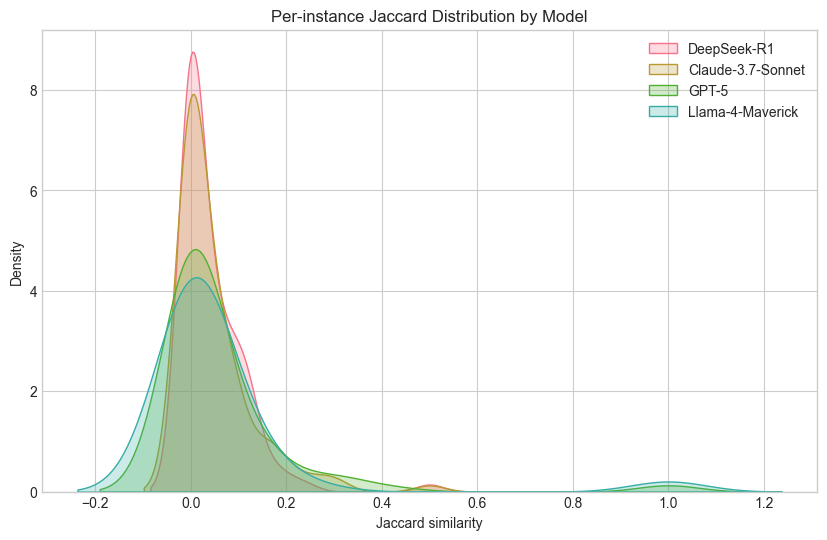

In [63]:
# %%
# 3.1.b Jaccard distribution plot

plt.figure(figsize=(10, 6))
for model_name, df_inst in instance_metrics.items():
    sns.kdeplot(df_inst["jaccard"], label=model_name, fill=True, alpha=0.25)
plt.title("Per-instance Jaccard Distribution by Model")
plt.xlabel("Jaccard similarity")
plt.ylabel("Density")
plt.legend()
plt.show()

,exact_match_rate
DeepSeek-R1,0.00
Claude-3.7-Sonnet,0.00
GPT-5,0.02
Llama-4-Maverick,0.04


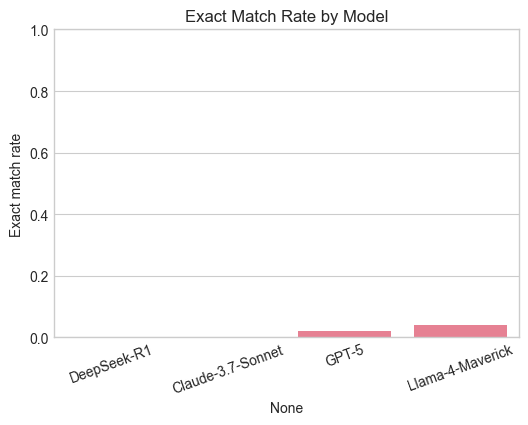

In [64]:
# 3.1.c Exact match rate bar plot

exact_match_rates = {
    model_name: df_inst["exact_match"].mean()
    for model_name, df_inst in instance_metrics.items()
}

exact_df = pd.DataFrame.from_dict(exact_match_rates, orient="index", columns=["exact_match_rate"])
display(exact_df)

plt.figure(figsize=(6, 4))
sns.barplot(x=exact_df.index, y=exact_df["exact_match_rate"])
plt.xticks(rotation=20)
plt.ylabel("Exact match rate")
plt.title("Exact Match Rate by Model")
plt.ylim(0, 1)
plt.show()


## ## 3.2 Error-Code-Level Evaluation (59 Fine-Grained Codes)
#
# **Goal:** Assess performance at the most granular level (each of the 59 labels).
#
# **Metrics**
# - Per-label precision, recall, F1  
# - Support per label  
# - FP/FN counts  
#
# **Visualizations**
# - F1 heatmap (labels × models)  
# - Top/bottom labels by F1 for each model

In [ ]:
def compute_per_label_metrics(y_true_df, y_pred_df):
    rows = []
    for col in y_true_df.columns:
        y_true = y_true_df[col].values
        y_pred = y_pred_df[col].values
        p = precision_score(y_true, y_pred, zero_division=0)
        r = recall_score(y_true, y_pred, zero_division=0)
        f = f1_score(y_true, y_pred, zero_division=0)
        support = int(y_true.sum())
        rows.append({"label": col, "precision": p, "recall": r, "f1": f, "support": support})
    return pd.DataFrame(rows).set_index("label")


def compute_fp_fn_counts(y_true_df, y_pred_df):
    fp = ((y_true_df == 0) & (y_pred_df == 1)).sum()
    fn = ((y_true_df == 1) & (y_pred_df == 0)).sum()
    out = pd.DataFrame({"FP": fp, "FN": fn})
    out.index.name = "label"
    return out

In [71]:
# 3.2.a Compute per-label metrics and FP/FN for each model

per_label_metrics = {}
per_label_fp_fn = {}

for model_name, pred_df in binary_preds.items():
    plm = compute_per_label_metrics(gt_aligned[label_cols], pred_df[label_cols])
    per_label_metrics[model_name] = plm
    per_label_fp_fn[model_name] = compute_fp_fn_counts(gt_aligned[label_cols], pred_df[label_cols])

# Example: quick peek at GPT-5 error-code-level
per_label_metrics["GPT-5"].sort_values("f1").head(10)

,precision,recall,f1,support
label,,,,
label_accessibility__language_accommodation__lack_of_language_accommodation,0.0,0.0,0.0,1
label_bias_stigmatization__condition__condition__related_stigmatization,0.0,0.0,0.0,0
label_bias_stigmatization__cultural__cultural_or_linguistic_insensitivity,0.0,0.0,0.0,0
label_bias_stigmatization__identity_respect__non__inclusive_pronoun_or_name_usage,0.0,0.0,0.0,0
label_bias_stigmatization__victim_blaming__condition_or_behavior_blame,0.0,0.0,0.0,0
label_bias_stigmatization__sociodemographic__sociodemographic_bias_or_stereotyping,0.0,0.0,0.0,0
label_clinical_reasoning__assessment__misinterpretation_of_objective_data,0.0,0.0,0.0,0
label_clinical_reasoning__assessment__omitted_differential_diagnosis,0.0,0.0,0.0,2
label_clinical_reasoning__clinical_recommendations__inappropriate_specialist_referral_recommendation,0.0,0.0,0.0,1


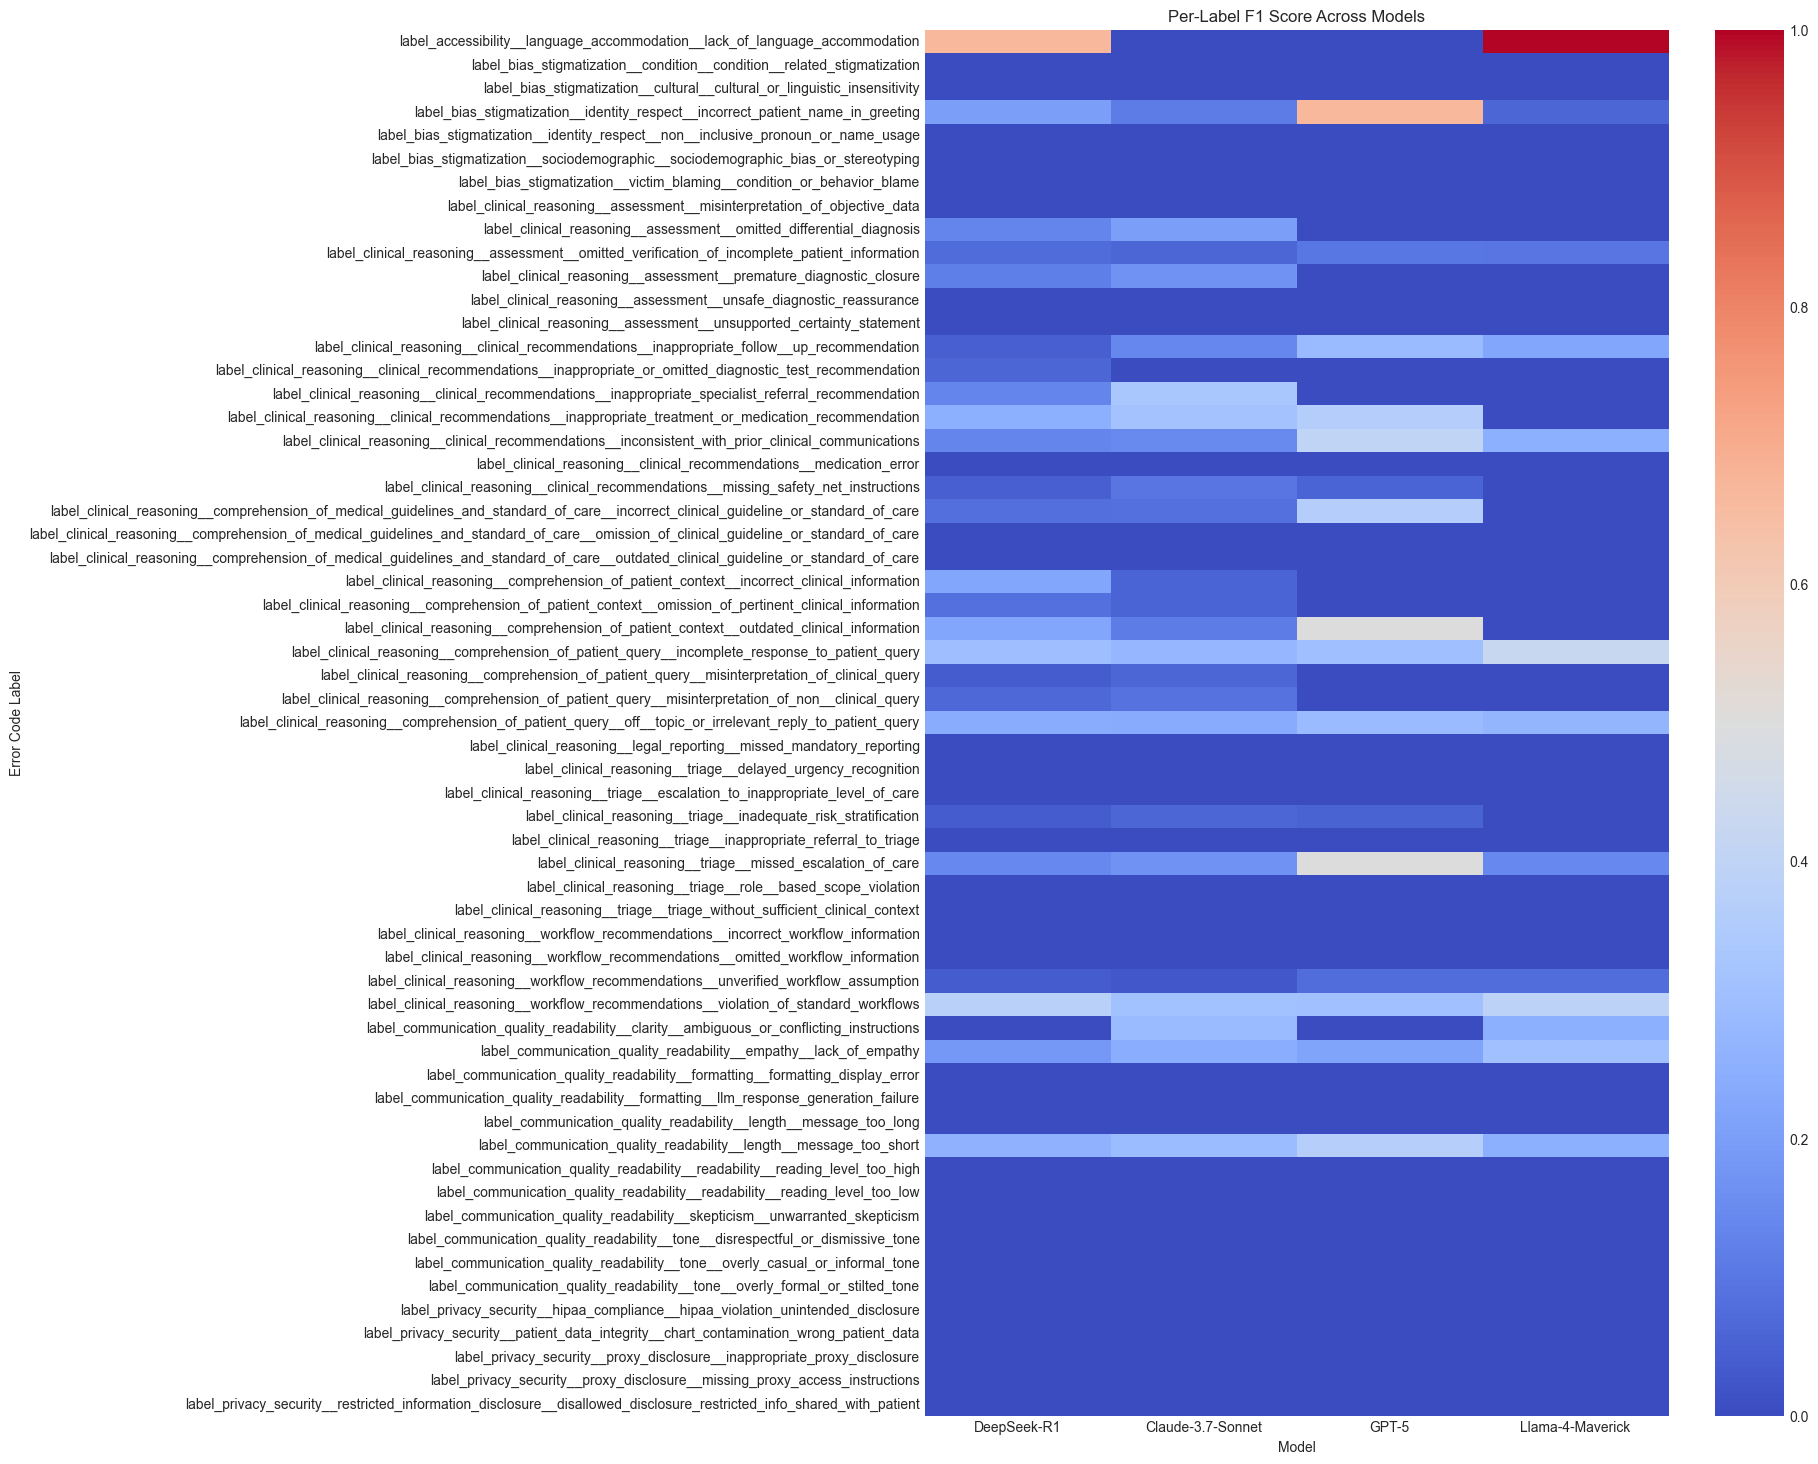

In [72]:
# 3.2.b F1 heatmap (labels × models)

f1_matrix = pd.DataFrame(index=label_cols)
for model_name, df_metrics in per_label_metrics.items():
    f1_matrix[model_name] = df_metrics["f1"]

plt.figure(figsize=(12, 18))
sns.heatmap(f1_matrix, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Per-Label F1 Score Across Models")
plt.ylabel("Error Code Label")
plt.xlabel("Model")
plt.show()

In [73]:
def show_top_bottom_labels(model_name, k=10):
    df_m = per_label_metrics[model_name].copy()
    print(f"=== {model_name}: bottom {k} labels by F1 ===")
    display(df_m.sort_values("f1", ascending=True).head(k))
    print(f"\n=== {model_name}: top {k} labels by F1 ===")
    display(df_m.sort_values("f1", ascending=False).head(k))

show_top_bottom_labels("Llama-4-Maverick", k=10)


=== Llama-4-Maverick: bottom 10 labels by F1 ===


,precision,recall,f1,support
label,,,,
label_bias_stigmatization__condition__condition__related_stigmatization,0.0,0.0,0.0,0
label_bias_stigmatization__cultural__cultural_or_linguistic_insensitivity,0.0,0.0,0.0,0
label_bias_stigmatization__sociodemographic__sociodemographic_bias_or_stereotyping,0.0,0.0,0.0,0
label_bias_stigmatization__identity_respect__non__inclusive_pronoun_or_name_usage,0.0,0.0,0.0,0
label_bias_stigmatization__victim_blaming__condition_or_behavior_blame,0.0,0.0,0.0,0
label_clinical_reasoning__assessment__misinterpretation_of_objective_data,0.0,0.0,0.0,0
label_clinical_reasoning__assessment__premature_diagnostic_closure,0.0,0.0,0.0,2
label_clinical_reasoning__assessment__omitted_differential_diagnosis,0.0,0.0,0.0,2
label_clinical_reasoning__clinical_recommendations__inappropriate_specialist_referral_recommendation,0.0,0.0,0.0,1



=== Llama-4-Maverick: top 10 labels by F1 ===


,precision,recall,f1,support
label,,,,
label_accessibility__language_accommodation__lack_of_language_accommodation,1.000000,1.000000,1.000000,1
label_clinical_reasoning__comprehension_of_patient_query__incomplete_response_to_patient_query,0.304348,0.700000,0.424242,10
label_clinical_reasoning__workflow_recommendations__violation_of_standard_workflows,0.411765,0.368421,0.388889,19
label_communication_quality_readability__empathy__lack_of_empathy,0.222222,0.500000,0.307692,4
label_clinical_reasoning__comprehension_of_patient_query__off__topic_or_irrelevant_reply_to_patient_query,0.166667,0.666667,0.266667,3
label_communication_quality_readability__clarity__ambiguous_or_conflicting_instructions,0.333333,0.200000,0.250000,10
label_communication_quality_readability__length__message_too_short,0.166667,0.500000,0.250000,6
label_clinical_reasoning__clinical_recommendations__inconsistent_with_prior_clinical_communications,0.200000,0.333333,0.250000,3
label_clinical_reasoning__clinical_recommendations__inappropriate_follow__up_recommendation,0.153846,0.400000,0.222222,5


# ## 3.3 Subdomain-Level Evaluation
#
# We now aggregate error codes into **subdomains**, using the provided codebook (`dedup_codebook.csv`),
# where each row is a unique (Domain, Subdomain, Error Code) combination.
#
# We use your `_slug` logic to ensure label names and codebook entries are mapped consistently:
# - Codebook error name → `_slug(...)` → `error_slug`  
# - GT label suffix (after `label_`) → `_slug(...)` → used to match codebook rows  
#
# Then we compute subdomain-level metrics and visualize F1.

In [78]:
# 3.3.a slug function for domain/subdomain/error codes
import re
def _slug(text: str) -> str:
    """
    File/identifier safe key for an error code.
    - Preserves underscores inside each hierarchy segment.
    - Uses "__" only to join Domain / Subdomain / Error Code boundaries.
    """
    segments = [seg.strip().lower() for seg in re.split(r"-+", text) if seg.strip()]
    slugged_segments = []
    for seg in segments:
        cleaned = re.sub(r"[^\w]+", "_", seg)
        cleaned = re.sub(r"_+", "_", cleaned).strip("_")
        if cleaned:
            slugged_segments.append(cleaned)
    return "__".join(slugged_segments)

In [82]:
# 3.3.b Load codebook and build ontology mappings

codebook = pd.read_csv(CODEBOOK_PATH)
display(codebook.head())
print("Codebook columns:", list(codebook.columns))

# Adjust these names if your CSV uses different column headers
codebook = codebook.rename(columns={
    "Dedup Error Code": "error_name",
    "Dedup Subdomain": "subdomain",
    "Dedup Domain": "domain"
})

required_cols = {"error_name", "subdomain", "domain"}
if not required_cols.issubset(set(codebook.columns)):
    raise ValueError(
        f"Codebook must have columns {required_cols} (adjust rename if needed)."
    )

# 1) Rebuild the SAME composite slug you used originally:
#    code_key = _slug(f"{Domain}-{Subdomain}-{Error Code}")
codebook["code_key"] = codebook.apply(
    lambda r: _slug(f"{r['domain']}-{r['subdomain']}-{r['error_name']}"),
    axis=1
)

print("\nExample composite code_keys:")
display(codebook[["domain", "subdomain", "error_name", "code_key"]].head(10))

# 2) Map code_key -> subdomain/domain
key_to_subdomain = dict(zip(codebook["code_key"], codebook["subdomain"]))
key_to_domain    = dict(zip(codebook["code_key"], codebook["domain"]))

# 3) Build label -> (subdomain, domain) mapping.
#    The GT label suffixes should already be these code_keys, e.g.:
#      label_clinical_reasoning__assessment__misinterpretation_of_objective_data
#        -> suffix = "clinical_reasoning__assessment__misinterpretation_of_objective_data"
label_to_subdomain = {}
label_to_domain = {}
unmatched_labels = []

for col in label_cols:
    suffix = col.replace("label_", "")
    suffix_key = suffix.lower()

    # Just in case there are tiny variations, also try slugged form:
    slug_key = _slug(suffix_key)

    if suffix_key in key_to_subdomain:
        key = suffix_key
    elif slug_key in key_to_subdomain:
        key = slug_key
    else:
        unmatched_labels.append((col, suffix_key, slug_key))
        continue

    label_to_subdomain[col] = key_to_subdomain[key]
    label_to_domain[col]    = key_to_domain[key]

print("Number of matched labels:", len(label_to_subdomain))
print("Number of unmatched labels:", len(unmatched_labels))

if unmatched_labels:
    print("\n⚠️ Unmatched labels (GT label column, suffix_key, slug_key):")
    for col, suffix_key, slug_key in unmatched_labels:
        print(f"  {col:80s}  | suffix_key: {suffix_key}  | slug_key: {slug_key}")
else:
    print("\n✅ All ground-truth labels matched to codebook code_key.")


,Dedup Error Code,Dedup Subdomain,Dedup Domain,Dedup Definition
0,Misinterpretation of Non-Clinical Query,Comprehension of Patient Query,Clinical Reasoning,"The reply misinterprets non-clniical queries (e.g. informational, administrative, etc), resulting in an inappropriate recommendation or redirection."
1,Misinterpretation of Clinical Query,Comprehension of Patient Query,Clinical Reasoning,"The reply fails to accurately interpret the patient's clinical question, leading to recommendations that do not address the patient's actual clinical concern."
2,Incomplete Response to Patient Query,Comprehension of Patient Query,Clinical Reasoning,The reply does not address all aspects of the patient's message or questions.
3,Off-topic or Irrelevant Reply to Patient Query,Comprehension of Patient Query,Clinical Reasoning,The reply includes information that is unrelated to the patient's message or concern.
4,Outdated Clinical Information,Comprehension of Patient Context,Clinical Reasoning,"The reply includes outdated facts about the patient's condition, history, results, medications, or care plan."


Codebook columns: ['Dedup Error Code', 'Dedup Subdomain', 'Dedup Domain', 'Dedup Definition']

Example composite code_keys:


,domain,subdomain,error_name,code_key
0,Clinical Reasoning,Comprehension of Patient Query,Misinterpretation of Non-Clinical Query,clinical_reasoning__comprehension_of_patient_query__misinterpretation_of_non__clinical_query
1,Clinical Reasoning,Comprehension of Patient Query,Misinterpretation of Clinical Query,clinical_reasoning__comprehension_of_patient_query__misinterpretation_of_clinical_query
2,Clinical Reasoning,Comprehension of Patient Query,Incomplete Response to Patient Query,clinical_reasoning__comprehension_of_patient_query__incomplete_response_to_patient_query
3,Clinical Reasoning,Comprehension of Patient Query,Off-topic or Irrelevant Reply to Patient Query,clinical_reasoning__comprehension_of_patient_query__off__topic_or_irrelevant_reply_to_patient_query
4,Clinical Reasoning,Comprehension of Patient Context,Outdated Clinical Information,clinical_reasoning__comprehension_of_patient_context__outdated_clinical_information
5,Clinical Reasoning,Comprehension of Patient Context,Incorrect Clinical Information,clinical_reasoning__comprehension_of_patient_context__incorrect_clinical_information
6,Clinical Reasoning,Comprehension of Patient Context,Omission of Pertinent Clinical Information,clinical_reasoning__comprehension_of_patient_context__omission_of_pertinent_clinical_information
7,Clinical Reasoning,Comprehension of Medical Guidelines and Standard of Care,Outdated Clinical Guideline or Standard of Care,clinical_reasoning__comprehension_of_medical_guidelines_and_standard_of_care__outdated_clinical_guideline_or_standard_of_care
8,Clinical Reasoning,Comprehension of Medical Guidelines and Standard of Care,Incorrect Clinical Guideline or Standard of Care,clinical_reasoning__comprehension_of_medical_guidelines_and_standard_of_care__incorrect_clinical_guideline_or_standard_of_care
9,Clinical Reasoning,Comprehension of Medical Guidelines and Standard of Care,Omission of Clinical Guideline or Standard of Care,clinical_reasoning__comprehension_of_medical_guidelines_and_standard_of_care__omission_of_clinical_guideline_or_standard_of_care


Number of matched labels: 59
Number of unmatched labels: 0

✅ All ground-truth labels matched to codebook code_key.


In [83]:
# 3.3.c Build hierarchical matrices (codes -> subdomains -> domains)

def build_hierarchical_matrices_from_labels(
    y_df,
    label_to_subdomain,
    label_to_domain
):
    """
    Aggregate per-code labels to subdomain and domain levels using label -> subdomain/domain mappings.
    Returns:
      - code_df (per-code labels)
      - subdomain_df
      - domain_df
      - subdomain -> list of label columns
      - domain -> list of subdomains
    """
    subdomain_to_labels = defaultdict(list)
    for label, sub in label_to_subdomain.items():
        subdomain_to_labels[sub].append(label)

    domain_to_subdomains = defaultdict(set)
    for label, dom in label_to_domain.items():
        sub = label_to_subdomain.get(label)
        if sub is not None:
            domain_to_subdomains[dom].add(sub)

    # Subdomain matrix
    subdomain_data = {}
    for sub, cols in subdomain_to_labels.items():
        subdomain_data[sub] = (y_df[cols].max(axis=1)).astype(int)
    subdomain_df = pd.DataFrame(subdomain_data, index=y_df.index)

    # Domain matrix
    domain_data = {}
    for dom, subs in domain_to_subdomains.items():
        subs = [s for s in subs if s in subdomain_df.columns]
        if subs:
            domain_data[dom] = (subdomain_df[subs].max(axis=1)).astype(int)
        else:
            domain_data[dom] = 0
    domain_df = pd.DataFrame(domain_data, index=y_df.index)

    domain_to_subdomains = {dom: sorted(list(subs)) for dom, subs in domain_to_subdomains.items()}

    return y_df[label_cols], subdomain_df, domain_df, subdomain_to_labels, domain_to_subdomains


# %%

,micro_f1,macro_f1
DeepSeek-R1,0.192260,0.111177
Claude-3.7-Sonnet,0.218281,0.097062
GPT-5,0.221831,0.105282
Llama-4-Maverick,0.180272,0.131556


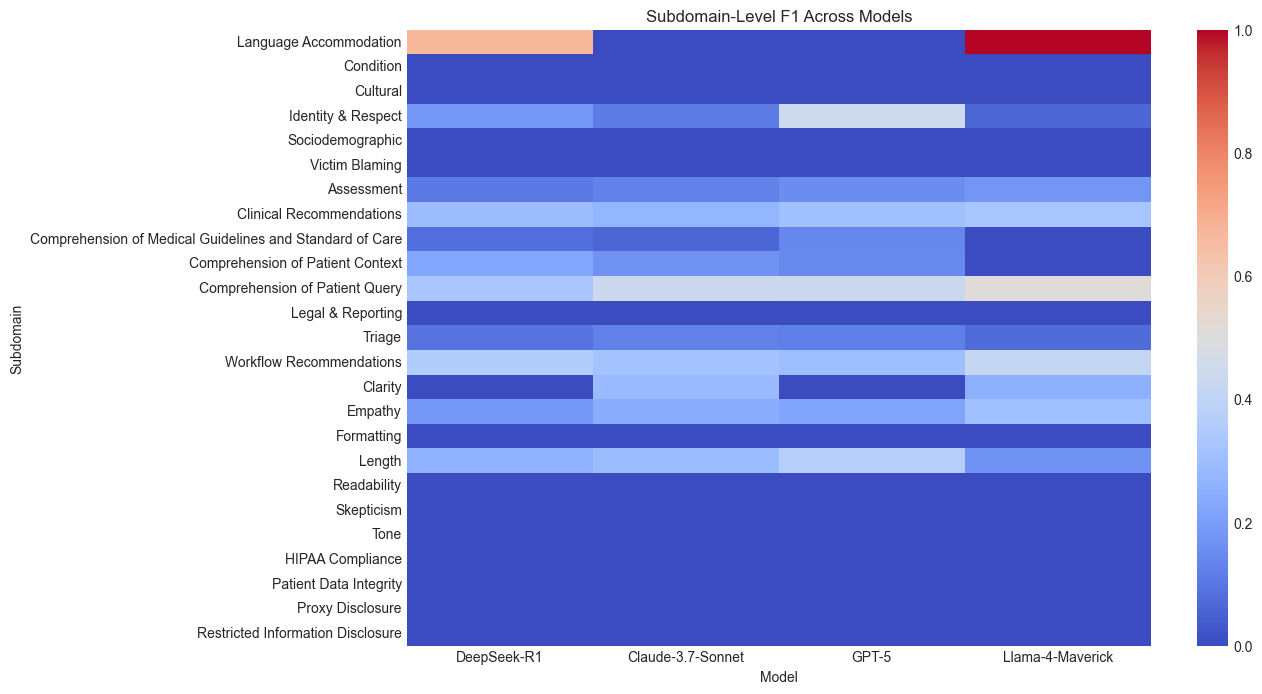

In [84]:
# 3.3.d Compute subdomain-level metrics and plot heatmap

subdomain_per_model = {}
subdomain_agg_results = {}

if label_to_subdomain:
    gt_code_df, gt_subdomain_df, gt_domain_df, SUBDOMAIN_TO_LABELS, DOMAIN_TO_SUBDOMAINS = (
        build_hierarchical_matrices_from_labels(gt_aligned[label_cols], label_to_subdomain, label_to_domain)
    )

    for model_name, pred_df in binary_preds.items():
        pred_code_df, pred_subdomain_df, pred_domain_df, _, _ = build_hierarchical_matrices_from_labels(
            pred_df[label_cols], label_to_subdomain, label_to_domain
        )

        metrics_sub = compute_per_label_metrics(gt_subdomain_df, pred_subdomain_df)
        subdomain_per_model[model_name] = metrics_sub

        agg = {
            "micro_f1": f1_score(gt_subdomain_df.values, pred_subdomain_df.values, average="micro", zero_division=0),
            "macro_f1": f1_score(gt_subdomain_df.values, pred_subdomain_df.values, average="macro", zero_division=0),
        }
        subdomain_agg_results[model_name] = agg

    sub_agg_df = pd.DataFrame(subdomain_agg_results).T
    display(sub_agg_df)

    # Subdomain F1 heatmap
    sub_f1_matrix = pd.DataFrame(index=gt_subdomain_df.columns)
    for model_name, df_metrics in subdomain_per_model.items():
        sub_f1_matrix[model_name] = df_metrics["f1"]

    plt.figure(figsize=(12, 8))
    sns.heatmap(sub_f1_matrix, cmap="coolwarm", vmin=0, vmax=1)
    plt.title("Subdomain-Level F1 Across Models")
    plt.ylabel("Subdomain")
    plt.xlabel("Model")
    plt.show()
else:
    print("⚠️ Skipping subdomain-level evaluation; label_to_subdomain mapping is empty.")

# ## 3.4 Domain-Level Evaluation
#
# Using the same hierarchical matrices, we now aggregate subdomains into the primary RAEC domains
# (whatever domain strings are used in the `Dedup Domain` column).
#
# We compute per-domain metrics and visualize F1 per domain × model.

,micro_f1,macro_f1
DeepSeek-R1,0.491103,0.368831
Claude-3.7-Sonnet,0.485714,0.235244
GPT-5,0.543103,0.280338
Llama-4-Maverick,0.423453,0.416362


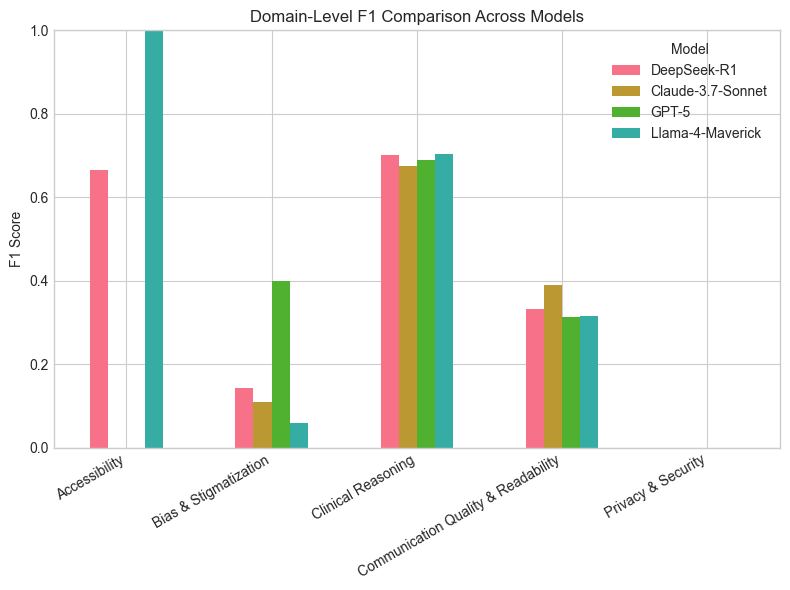

In [85]:
domain_per_model = {}
domain_agg_results = {}

if label_to_subdomain:
    for model_name, pred_df in binary_preds.items():
        pred_code_df, pred_subdomain_df, pred_domain_df, _, _ = build_hierarchical_matrices_from_labels(
            pred_df[label_cols], label_to_subdomain, label_to_domain
        )

        metrics_dom = compute_per_label_metrics(gt_domain_df, pred_domain_df)
        domain_per_model[model_name] = metrics_dom

        agg = {
            "micro_f1": f1_score(gt_domain_df.values, pred_domain_df.values, average="micro", zero_division=0),
            "macro_f1": f1_score(gt_domain_df.values, pred_domain_df.values, average="macro", zero_division=0),
        }
        domain_agg_results[model_name] = agg

    dom_agg_df = pd.DataFrame(domain_agg_results).T
    display(dom_agg_df)

    dom_f1_matrix = pd.DataFrame(index=gt_domain_df.columns)
    for model_name, df_metrics in domain_per_model.items():
        dom_f1_matrix[model_name] = df_metrics["f1"]

    dom_f1_matrix.plot(kind="bar", figsize=(8, 6))
    plt.ylabel("F1 Score")
    plt.title("Domain-Level F1 Comparison Across Models")
    plt.xticks(rotation=30, ha="right")
    plt.ylim(0, 1)
    plt.legend(title="Model")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Skipping domain-level evaluation; label_to_subdomain mapping is empty.")

# ## 3.5 Aggregate Model Comparison
#
# Here we compute aggregate multi-label metrics across all error codes:
# - Micro F1  
# - Macro F1  
# - Weighted F1  
# - Samplewise Jaccard  
# - Hamming loss  
# - Exact-match ratio  
#
# And we visualize them in a radar plot.

In [87]:
def compute_aggregate_metrics(y_true, y_pred):
    metrics = {}
    metrics["micro_f1"] = f1_score(y_true, y_pred, average="micro", zero_division=0)
    metrics["macro_f1"] = f1_score(y_true, y_pred, average="macro", zero_division=0)
    metrics["weighted_f1"] = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    metrics["micro_precision"] = precision_score(y_true, y_pred, average="micro", zero_division=0)
    metrics["micro_recall"] = recall_score(y_true, y_pred, average="micro", zero_division=0)
    metrics["hamming_loss"] = hamming_loss(y_true, y_pred)
    try:
        metrics["jaccard_samples"] = jaccard_score(y_true, y_pred, average="samples", zero_division=0)
    except ValueError:
        metrics["jaccard_samples"] = np.nan
    metrics["exact_match"] = (y_true == y_pred).all(axis=1).mean()
    return metrics

In [88]:
# 3.5.a Compute aggregate metrics for each model

aggregate_results = {}
y_true_codes = gt_aligned[label_cols].values

for model_name, pred_df in binary_preds.items():
    y_pred_codes = pred_df[label_cols].values
    aggregate_results[model_name] = compute_aggregate_metrics(y_true_codes, y_pred_codes)

aggregate_results_df = pd.DataFrame(aggregate_results).T
display(aggregate_results_df)

,micro_f1,macro_f1,weighted_f1,micro_precision,micro_recall,hamming_loss,jaccard_samples,exact_match
DeepSeek-R1,0.088435,0.070186,0.190785,0.047515,0.637255,0.227119,0.042820,0.00
Claude-3.7-Sonnet,0.108642,0.066317,0.204912,0.059299,0.647059,0.183559,0.047594,0.00
GPT-5,0.119080,0.082123,0.224038,0.069074,0.431373,0.110339,0.053884,0.02
Llama-4-Maverick,0.077647,0.063295,0.210889,0.044118,0.323529,0.132881,0.024734,0.04


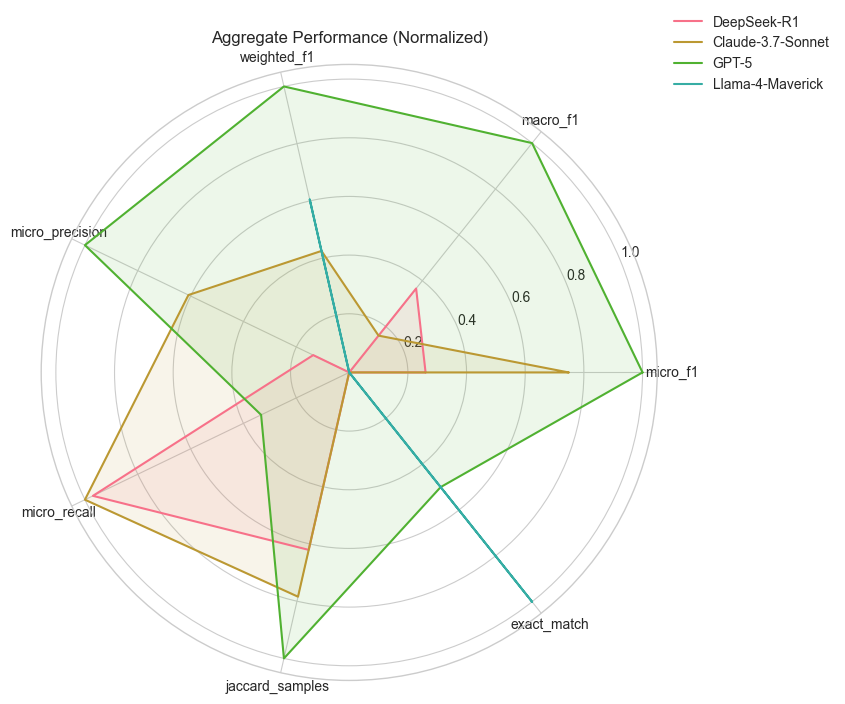

In [89]:
# 3.5.b Radar plot of aggregate metrics

def plot_radar(agg_df, title="Aggregate Performance Comparison"):
    metrics_for_plot = [
        "micro_f1", "macro_f1", "weighted_f1",
        "micro_precision", "micro_recall",
        "jaccard_samples", "exact_match"
    ]
    df = agg_df[metrics_for_plot].copy()
    df_norm = (df - df.min()) / (df.max() - df.min() + 1e-8)

    labels = df_norm.columns.tolist()
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for model in df_norm.index:
        values = df_norm.loc[model].tolist()
        values += values[:1]
        ax.plot(angles, values, label=model)
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(title)
    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
    plt.show()

plot_radar(aggregate_results_df, "Aggregate Performance (Normalized)")

# ## 3.6 Confusion and Failure Mode Analysis
#
# We examine:
# - Top labels by FN (missed errors)  
# - Top labels by FP (over-called errors)  
# to inform guardrail and calibration strategies.

In [90]:
failure_summary = {}

for model_name, pred_df in binary_preds.items():
    fp_fn = compute_fp_fn_counts(gt_aligned[label_cols], pred_df[label_cols])
    failure_summary[model_name] = fp_fn

    print(f"=== {model_name}: Top 10 labels by FN (missed errors) ===")
    display(fp_fn.sort_values("FN", ascending=False).head(10))
    print(f"\n=== {model_name}: Top 10 labels by FP (over-called errors) ===")
    display(fp_fn.sort_values("FP", ascending=False).head(10))
    print("-" * 80)

=== DeepSeek-R1: Top 10 labels by FN (missed errors) ===


,FP,FN
label,,
label_communication_quality_readability__clarity__ambiguous_or_conflicting_instructions,8,10
label_clinical_reasoning__workflow_recommendations__violation_of_standard_workflows,37,6
label_clinical_reasoning__clinical_recommendations__inappropriate_follow__up_recommendation,39,4
label_clinical_reasoning__comprehension_of_medical_guidelines_and_standard_of_care__incorrect_clinical_guideline_or_standard_of_care,20,3
label_communication_quality_readability__length__message_too_short,14,3
label_clinical_reasoning__clinical_recommendations__inappropriate_treatment_or_medication_recommendation,10,2
label_clinical_reasoning__clinical_recommendations__missing_safety_net_instructions,40,2
label_clinical_reasoning__comprehension_of_patient_query__misinterpretation_of_clinical_query,52,1
label_bias_stigmatization__identity_respect__incorrect_patient_name_in_greeting,7,1



=== DeepSeek-R1: Top 10 labels by FP (over-called errors) ===


,FP,FN
label,,
label_clinical_reasoning__workflow_recommendations__omitted_workflow_information,83,0
label_clinical_reasoning__assessment__omitted_verification_of_incomplete_patient_information,79,0
label_clinical_reasoning__comprehension_of_medical_guidelines_and_standard_of_care__omission_of_clinical_guideline_or_standard_of_care,67,0
label_clinical_reasoning__triage__triage_without_sufficient_clinical_context,63,0
label_clinical_reasoning__comprehension_of_patient_query__misinterpretation_of_clinical_query,52,1
label_clinical_reasoning__triage__inadequate_risk_stratification,52,0
label_clinical_reasoning__workflow_recommendations__unverified_workflow_assumption,50,1
label_clinical_reasoning__comprehension_of_patient_query__incomplete_response_to_patient_query,47,0
label_clinical_reasoning__comprehension_of_patient_context__omission_of_pertinent_clinical_information,44,0


--------------------------------------------------------------------------------
=== Claude-3.7-Sonnet: Top 10 labels by FN (missed errors) ===


,FP,FN
label,,
label_clinical_reasoning__workflow_recommendations__violation_of_standard_workflows,46,7
label_communication_quality_readability__clarity__ambiguous_or_conflicting_instructions,26,4
label_clinical_reasoning__comprehension_of_medical_guidelines_and_standard_of_care__incorrect_clinical_guideline_or_standard_of_care,19,3
label_clinical_reasoning__comprehension_of_patient_query__incomplete_response_to_patient_query,34,3
label_clinical_reasoning__comprehension_of_patient_context__incorrect_clinical_information,30,3
label_clinical_reasoning__clinical_recommendations__inappropriate_follow__up_recommendation,35,2
label_clinical_reasoning__triage__missed_escalation_of_care,8,2
label_clinical_reasoning__comprehension_of_patient_context__outdated_clinical_information,15,1
label_clinical_reasoning__clinical_recommendations__inappropriate_treatment_or_medication_recommendation,12,1



=== Claude-3.7-Sonnet: Top 10 labels by FP (over-called errors) ===


,FP,FN
label,,
label_clinical_reasoning__workflow_recommendations__unverified_workflow_assumption,80,1
label_clinical_reasoning__workflow_recommendations__omitted_workflow_information,73,0
label_clinical_reasoning__comprehension_of_patient_context__omission_of_pertinent_clinical_information,69,0
label_clinical_reasoning__assessment__omitted_verification_of_incomplete_patient_information,63,1
label_clinical_reasoning__triage__triage_without_sufficient_clinical_context,50,0
label_clinical_reasoning__workflow_recommendations__violation_of_standard_workflows,46,7
label_clinical_reasoning__clinical_recommendations__missing_safety_net_instructions,37,1
label_clinical_reasoning__clinical_recommendations__inconsistent_with_prior_clinical_communications,35,0
label_clinical_reasoning__clinical_recommendations__inappropriate_follow__up_recommendation,35,2


--------------------------------------------------------------------------------
=== GPT-5: Top 10 labels by FN (missed errors) ===


,FP,FN
label,,
label_clinical_reasoning__workflow_recommendations__violation_of_standard_workflows,14,13
label_communication_quality_readability__clarity__ambiguous_or_conflicting_instructions,5,10
label_clinical_reasoning__comprehension_of_patient_context__incorrect_clinical_information,3,4
label_clinical_reasoning__clinical_recommendations__inappropriate_follow__up_recommendation,7,3
label_clinical_reasoning__comprehension_of_patient_query__incomplete_response_to_patient_query,35,2
label_clinical_reasoning__clinical_recommendations__inappropriate_treatment_or_medication_recommendation,5,2
label_clinical_reasoning__comprehension_of_medical_guidelines_and_standard_of_care__incorrect_clinical_guideline_or_standard_of_care,5,2
label_clinical_reasoning__assessment__omitted_differential_diagnosis,20,2
label_clinical_reasoning__clinical_recommendations__missing_safety_net_instructions,31,2



=== GPT-5: Top 10 labels by FP (over-called errors) ===


,FP,FN
label,,
label_clinical_reasoning__workflow_recommendations__omitted_workflow_information,67,0
label_clinical_reasoning__assessment__omitted_verification_of_incomplete_patient_information,55,0
label_clinical_reasoning__comprehension_of_medical_guidelines_and_standard_of_care__omission_of_clinical_guideline_or_standard_of_care,51,0
label_clinical_reasoning__triage__inadequate_risk_stratification,37,0
label_clinical_reasoning__comprehension_of_patient_query__incomplete_response_to_patient_query,35,2
label_communication_quality_readability__readability__reading_level_too_low,33,0
label_clinical_reasoning__clinical_recommendations__missing_safety_net_instructions,31,2
label_communication_quality_readability__empathy__lack_of_empathy,29,0
label_clinical_reasoning__triage__triage_without_sufficient_clinical_context,25,0


--------------------------------------------------------------------------------
=== Llama-4-Maverick: Top 10 labels by FN (missed errors) ===


,FP,FN
label,,
label_clinical_reasoning__workflow_recommendations__violation_of_standard_workflows,10,12
label_communication_quality_readability__clarity__ambiguous_or_conflicting_instructions,4,8
label_clinical_reasoning__comprehension_of_patient_context__incorrect_clinical_information,2,4
label_clinical_reasoning__comprehension_of_medical_guidelines_and_standard_of_care__incorrect_clinical_guideline_or_standard_of_care,2,4
label_clinical_reasoning__clinical_recommendations__inappropriate_treatment_or_medication_recommendation,1,4
label_clinical_reasoning__clinical_recommendations__inappropriate_follow__up_recommendation,11,3
label_clinical_reasoning__clinical_recommendations__missing_safety_net_instructions,14,3
label_clinical_reasoning__comprehension_of_patient_query__incomplete_response_to_patient_query,16,3
label_communication_quality_readability__length__message_too_short,15,3



=== Llama-4-Maverick: Top 10 labels by FP (over-called errors) ===


,FP,FN
label,,
label_clinical_reasoning__workflow_recommendations__omitted_workflow_information,65,0
label_bias_stigmatization__identity_respect__incorrect_patient_name_in_greeting,63,0
label_communication_quality_readability__tone__overly_casual_or_informal_tone,52,0
label_clinical_reasoning__triage__triage_without_sufficient_clinical_context,40,0
label_clinical_reasoning__assessment__omitted_verification_of_incomplete_patient_information,37,1
label_clinical_reasoning__assessment__unsupported_certainty_statement,34,0
label_clinical_reasoning__comprehension_of_patient_context__omission_of_pertinent_clinical_information,26,2
label_clinical_reasoning__triage__role__based_scope_violation,23,1
label_clinical_reasoning__workflow_recommendations__unverified_workflow_assumption,23,1


--------------------------------------------------------------------------------


In [91]:
# ## 3.7 Qualitative Case Studies (Disagreement Examples)
#
# We identify examples where a model has very low Jaccard similarity to the ground truth,
# which are good candidates for qualitative review (e.g., for figures, tables, or clinician annotation).

In [93]:
def get_worst_cases_by_jaccard(
    y_true_df,
    y_pred_df,
    top_n=10
):
    inst = compute_instance_level_metrics(y_true_df, y_pred_df)
    worst = inst.sort_values("jaccard", ascending=True).head(top_n)
    worst = worst.reset_index().rename(columns={"index": "row_idx"})
    return worst


In [96]:
# Example: worst cases for GPT-5
gpt5_worst = get_worst_cases_by_jaccard(gt_aligned[label_cols], binary_preds["GPT-5"][label_cols], top_n=10)
display(gpt5_worst)

# Inspect first example
if not gpt5_worst.empty:
    example_idx = int(gpt5_worst.iloc[0]["row_idx"])
    msg_id = gt_aligned.index[example_idx]
    print("Row index in aligned frames:", example_idx)
    print("Message ID:", msg_id)
    print("Ground truth positive codes:", gt_aligned.iloc[example_idx]["positive_codes"])
    # Example: inspect label vectors
    print(gt_aligned.loc[msg_id])
    print(binary_preds["GPT-5"].loc[msg_id, label_cols])

,row_idx,jaccard,exact_match
0,98,0.0,0
1,96,0.0,0
2,2,0.0,0
3,8,0.0,0
4,4,0.0,0
5,5,0.0,0
6,6,0.0,0
7,94,0.0,0
8,0,0.0,0
9,92,0.0,0


Row index in aligned frames: 98
Message ID: 305128
Ground truth positive codes: []
patient_message                                                                                                             Sounds good. We can take a look at the new tests results when I take them. May as well go ahead and do the artery calcium score I can pay out of pocket. I do know one of my CT scans did find mild ...
llm_response                                                                                                                Hi, John- Thanks for letting me know. I will go ahead and order the CT coronary artery calcium score for you. Once you have the test done, we can review the results together. I understand your int...
patient_info                                                                                                                Healthcare Provider Name: Suffoletto, Jo-Anne Landry Department Specialty: Primary Care Department Name: Stanford Internal Medicine - West Depart